In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
colors = ['#2e3273','#A41623','#C46BAE']

# 1. Visualización y análisis

In [155]:
serie_datos = pd.read_csv('../data/series.csv')
serie_datos.DATE = pd.to_datetime(serie_datos.DATE)
serie_datos = serie_datos[serie_datos.DATE>pd.to_datetime('2019-06-01')]
serie_datos.sort_values(by='DATE',inplace=True)
serie_datos = serie_datos.set_index('DATE')

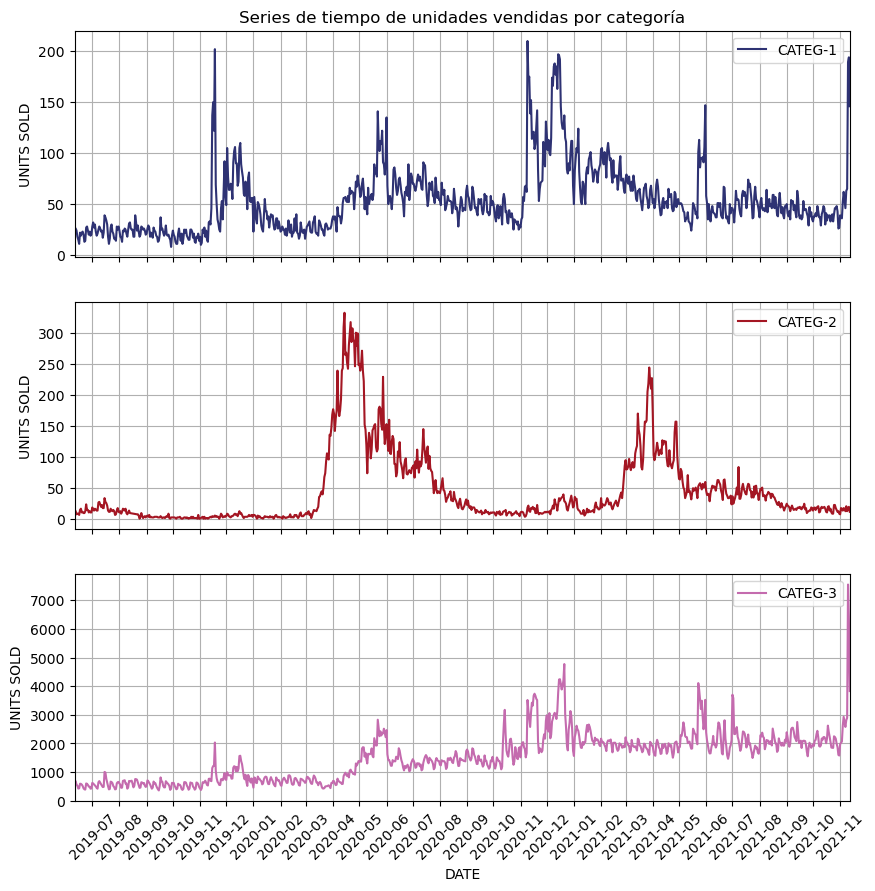

In [156]:
fig, axs = plt.subplots(3,1,figsize=(10,10),sharex=True)
serie_datos[serie_datos.CATEGORY=='CATEG-1'].plot(y='UNITS_SOLD',kind='line',ax=axs[0],label='CATEG-1',use_index=True,c=colors[0])
serie_datos[serie_datos.CATEGORY=='CATEG-2'].plot(y='UNITS_SOLD',kind='line',ax=axs[1],label='CATEG-2',use_index=True,c=colors[1])
serie_datos[serie_datos.CATEGORY=='CATEG-3'].plot(y='UNITS_SOLD',kind='line',ax=axs[2],label='CATEG-3',use_index=True,c=colors[2])
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0].xaxis.set_major_formatter(DateFormatter("%Y-%m   "))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[2].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
axs[0].set_ylabel('UNITS SOLD')
axs[1].set_ylabel('UNITS SOLD')
axs[2].set_ylabel('UNITS SOLD')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[0].title.set_text('Series de tiempo de unidades vendidas por categoría')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 2. Descomposición

## Descomposición multiplicativa

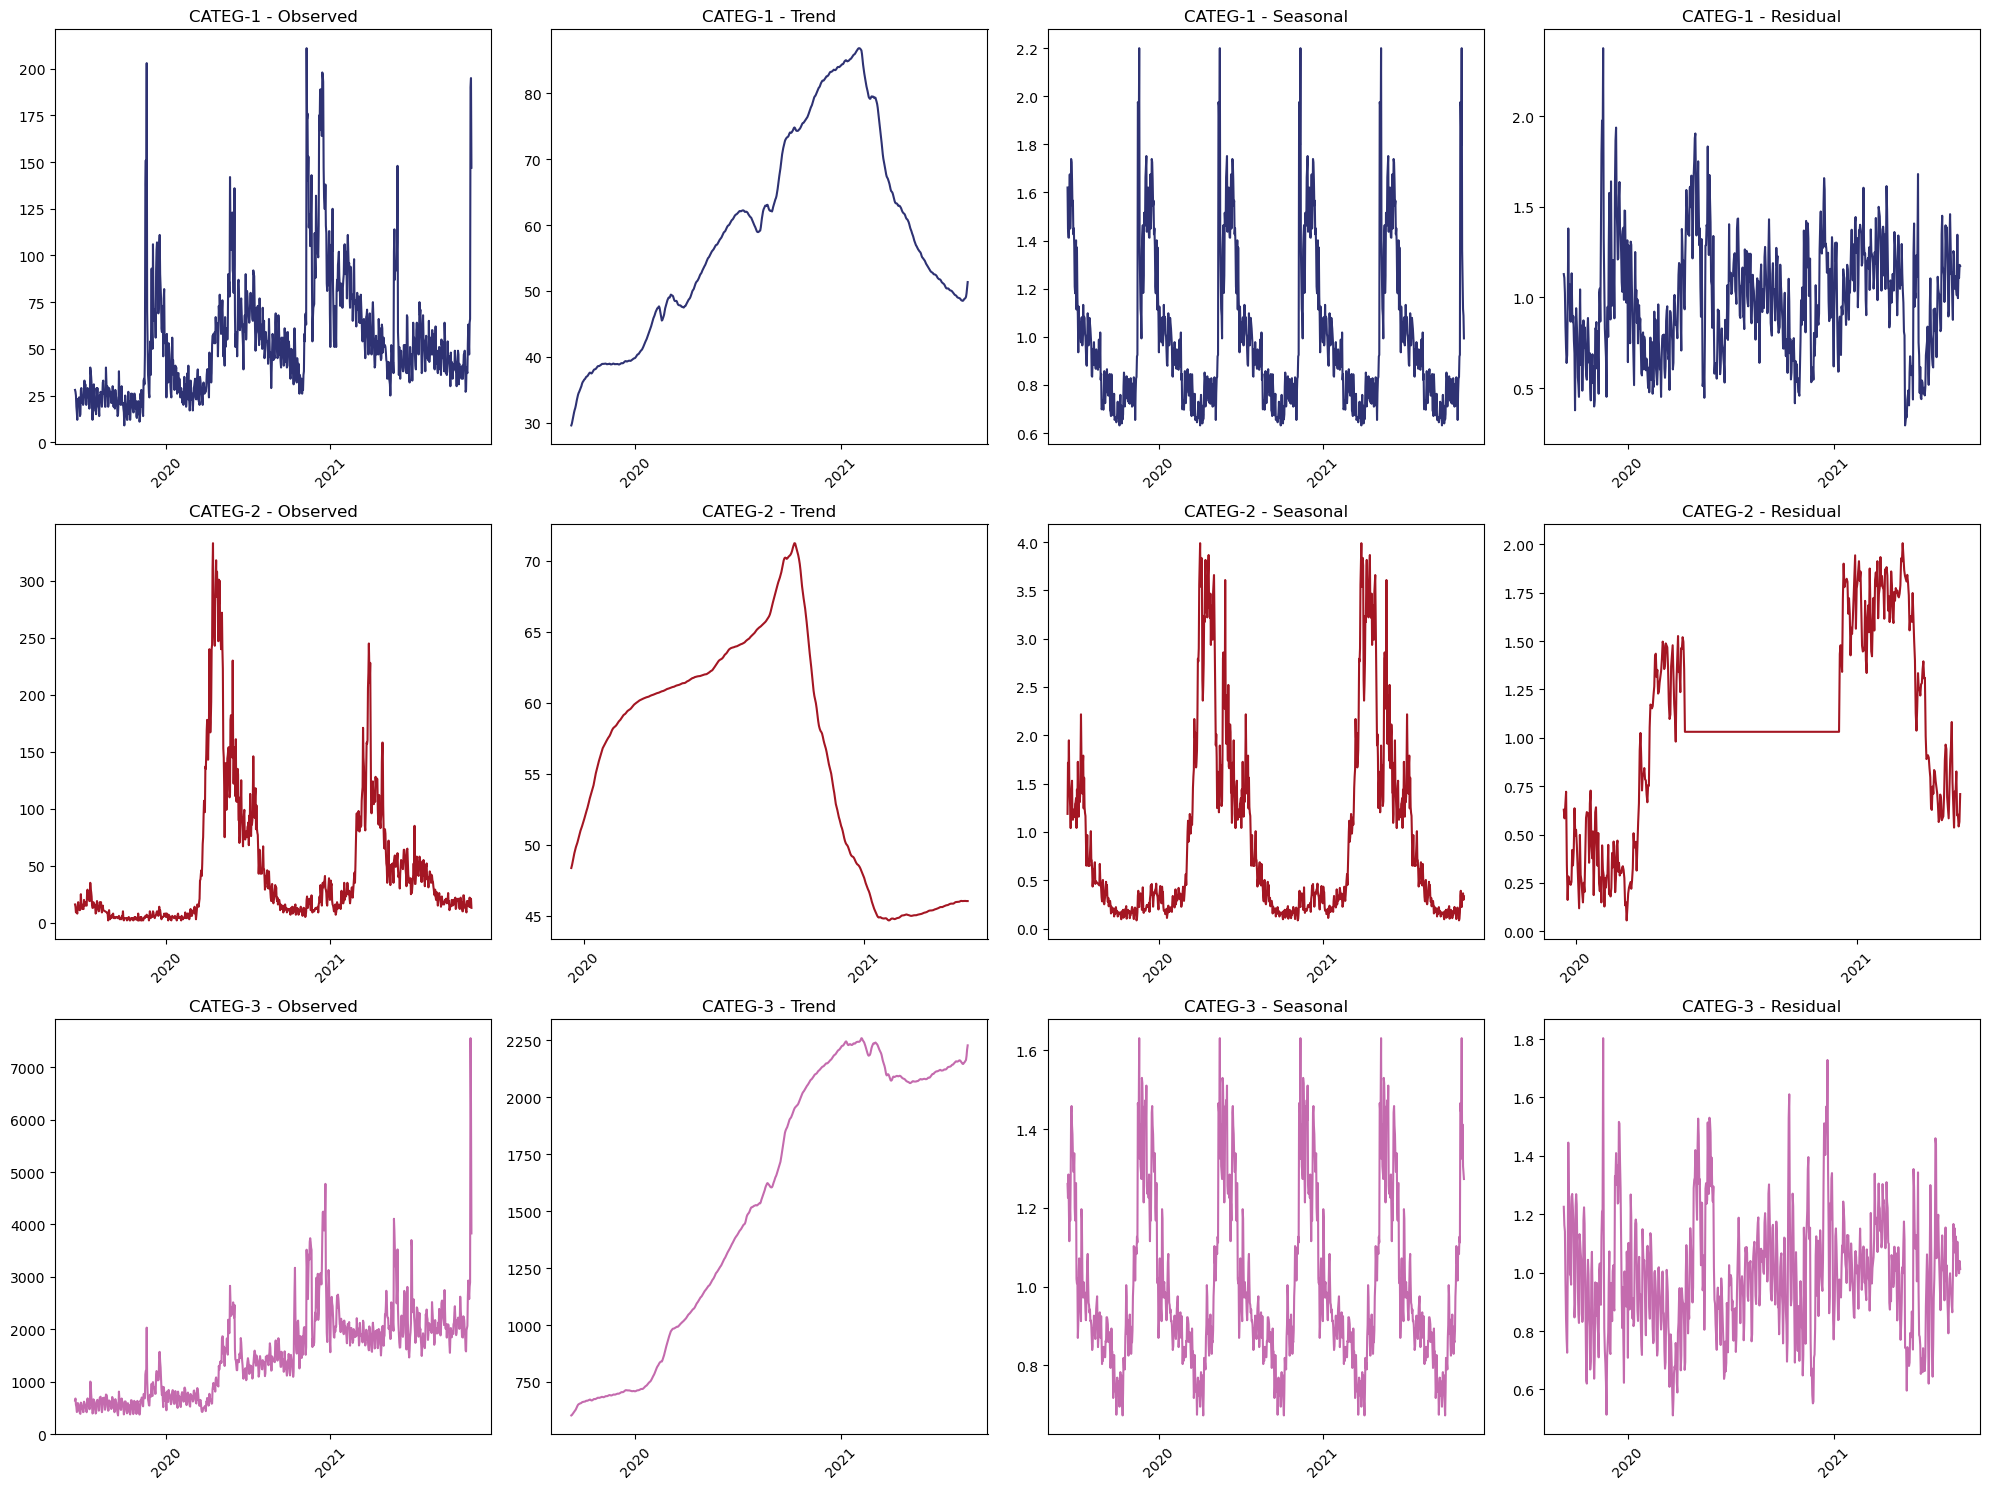

In [157]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
categories = ['CATEG-1', 'CATEG-2', 'CATEG-3']
decomposition_titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
periods = [180,360,180]

for i, category in enumerate(categories):
    data = serie_datos[serie_datos.CATEGORY == category].UNITS_SOLD + 1
    multiplicative_decomposition = seasonal_decompose(data, model='multiplicative', period=periods[i])
    
    components = [data, multiplicative_decomposition.trend, 
                  multiplicative_decomposition.seasonal, 
                  multiplicative_decomposition.resid]
    
    for j, (component, title) in enumerate(zip(components, decomposition_titles)):
        ax = axs[i, j]
        ax.plot(serie_datos[serie_datos.CATEGORY == category].reset_index().DATE, component,c=colors[i])
        ax.set_title(f'{category} - {title}')
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()


## Descomposición aditiva

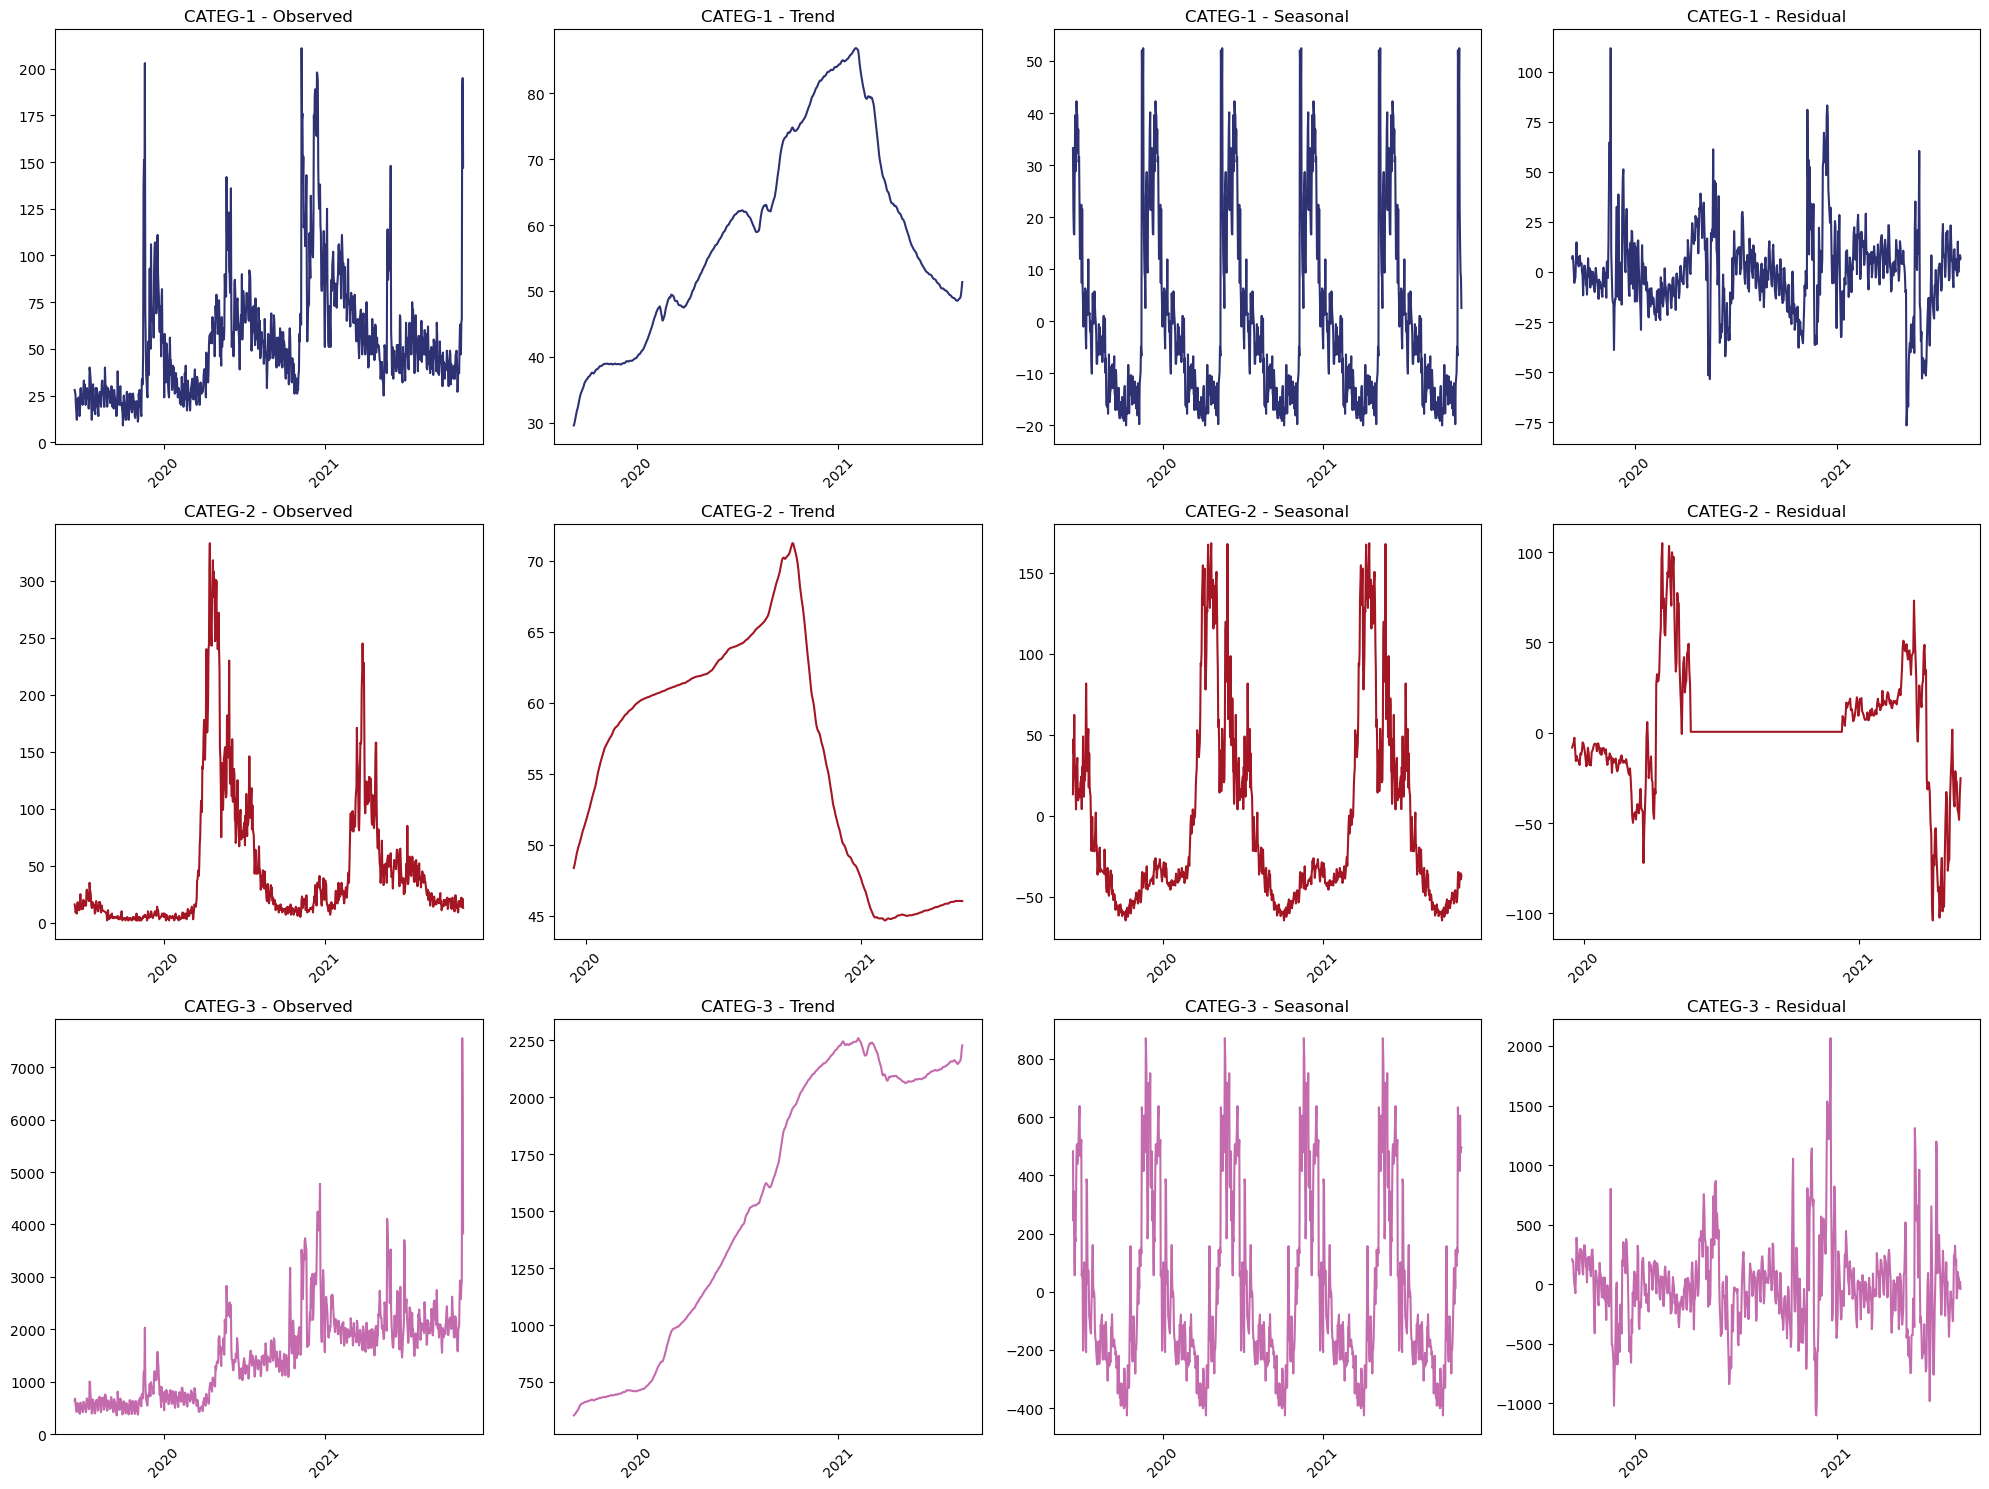

In [158]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
categories = ['CATEG-1', 'CATEG-2', 'CATEG-3']
decomposition_titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
periods = [180,360,180]

for i, category in enumerate(categories):
    data = serie_datos[serie_datos.CATEGORY == category].UNITS_SOLD + 1
    additive_decomposition = seasonal_decompose(data, model='additive', period=periods[i])
    
    components = [data, additive_decomposition.trend, 
                  additive_decomposition.seasonal, 
                  additive_decomposition.resid]
    
    for j, (component, title) in enumerate(zip(components, decomposition_titles)):
        ax = axs[i, j]
        ax.plot(serie_datos[serie_datos.CATEGORY == category].reset_index().DATE, component,c=colors[i])
        ax.set_title(f'{category} - {title}')
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()


# 3. Feature selection

In [159]:
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from tsfresh import extract_features, extract_relevant_features
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import impute

In [160]:
df_tsfresh_1 = serie_datos[serie_datos.CATEGORY=='CATEG-1'].reset_index()
df_tsfresh_1 = df_tsfresh_1[['DATE','UNITS_SOLD']].rename(columns={'DATE':'time','UNITS_SOLD':'value'})
df_tsfresh_1 = df_tsfresh_1.sort_values('time')
forecasting_frame_1,y_1 = make_forecasting_frame(df_tsfresh_1['value'], kind='rolling', max_timeshift=10,rolling_direction=1)

Rolling: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


In [161]:
extracted_features_1 = extract_features(timeseries_container=forecasting_frame_1, column_id='id', column_sort='time', column_value='value')
extracted_features_1.drop(columns=extracted_features_1.columns[extracted_features_1.isna().sum()==extracted_features_1.shape[0]],inplace=True)
extracted_features_1 = impute(extracted_features_1)
print(extracted_features_1.shape)
extracted_features_1.head(8)

Feature Extraction: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]


(885, 338)


value__variance_larger_than_standard_deviation  \
id 1                                             0.0   
   2                                             0.0   
   3                                             1.0   
   4                                             1.0   
   5                                             1.0   
   6                                             1.0   
   7                                             1.0   
   8                                             1.0   

      value__has_duplicate_max  value__has_duplicate_min  \
id 1                       0.0                       0.0   
   2                       0.0                       0.0   
   3                       0.0                       0.0   
   4                       0.0                       0.0   
   5                       0.0                       0.0   
   6                       0.0                       0.0   
   7                       0.0                       0.0   
   8                       0.0                       0.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
id 1                   0.0               27.0              729.0   
   2                   0.0               53.0             1405.0   
   3                   0.0               77.0             1981.0   
   4                   0.0               95.0             2305.0   
   5                   0.0              110.0             2530.0   
   6                   0.0              121.0             2651.0   
   7                   0.0              143.0             3135.0   
   8                   0.0              162.0             3496.0   

      value__mean_abs_change  value__mean_change  \
id 1                7.222222           -0.111111   
   2                1.000000           -1.000000   
   3                1.500000           -1.500000   
   4                3.000000           -3.000000   
   5                3.000000           -3.000000   
   6                3.200000           -3.200000   
   7                4.500000           -0.833333   
   8                4.285714           -1.142857   

      value__mean_second_derivative_central  value__median  ...  \
id 1                               0.000000           27.0  ...   
   2                               0.000000           26.5  ...   
   3                              -0.500000           26.0  ...   
   4                              -1.250000           25.0  ...   
   5                              -0.333333           24.0  ...   
   6                              -0.375000           21.0  ...   
   7                               1.200000           22.0  ...   
   8                              -0.166667           20.5  ...   

      value__fourier_entropy__bins_3  value__fourier_entropy__bins_5  \
id 1                        0.867563                        1.098612   
   2                       -0.000000                       -0.000000   
   3                        0.693147                        0.693147   
   4                        0.636514                        0.636514   
   5                        0.636514                        0.636514   
   6                        0.562335                        0.562335   
   7                        0.562335                        1.039721   
   8                        0.950271                        1.054920   

      value__fourier_entropy__bins_10  value__fourier_entropy__bins_100  \
id 1                         1.329661                          1.791759   
   2                        -0.000000                         -0.000000   
   3                         0.693147                          0.693147   
   4                         0.636514                          1.098612   
   5                         1.098612                          1.098612   
   6                         0.562335                          1.386294   
   7                         1.039721                          1.386294   
   8                     

In [162]:
small_feat_set_1 = select_features(extracted_features_1, y_1, fdr_level = 0.005, ml_task = 'regression')
print(small_feat_set_1.shape)
small_feat_set_1.head(8)

(885, 176)


value__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)  \
id 1                                                      64.165832   
   2                                                      64.165832   
   3                                                      64.165832   
   4                                                      64.165832   
   5                                                      64.165832   
   6                                                      64.165832   
   7                                                      64.165832   
   8                                                      64.165832   

      value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)  \
id 1                                                      84.754702   
   2                                                      84.754702   
   3                                                      84.754702   
   4                                                      84.754702   
   5                                                      84.754702   
   6                                                      84.754702   
   7                                                      84.754702   
   8                                                      84.754702   

      value__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)  \
id 1                                                     75.733653   
   2                                                     75.733653   
   3                                                     75.733653   
   4                                                     75.733653   
   5                                                     75.733653   
   6                                                     75.733653   
   7                                                     75.733653   
   8                                                     75.733653   

      value__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)  \
id 1                                                      73.397891   
   2                                                      73.397891   
   3                                                      73.397891   
   4                                                      73.397891   
   5                                                      73.397891   
   6                                                      73.397891   
   7                                                      73.397891   
   8                                                      16.233399   

      value__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)  \
id 1                                                      96.876289   
   2                                                      96.876289   
   3                                                      96.876289   
   4                                                      96.876289   
   5                                                      96.876289   
   6                                                      96.876289   
   7                                                      96.876289   
   8                                                      21.932197   

      value__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)  \
id 1                                                     91.951347   
   2                                                     91.951347   
   3                                                     91.951347   
   4                                                     91.951347   
   5                                                     91.951347   
   6                                                     91.951347   
   7                                                     91.951347   
   8                                                     91.951347   

      value__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)  \
id 1                                                      71.632257   
   2                                      

<Axes: >

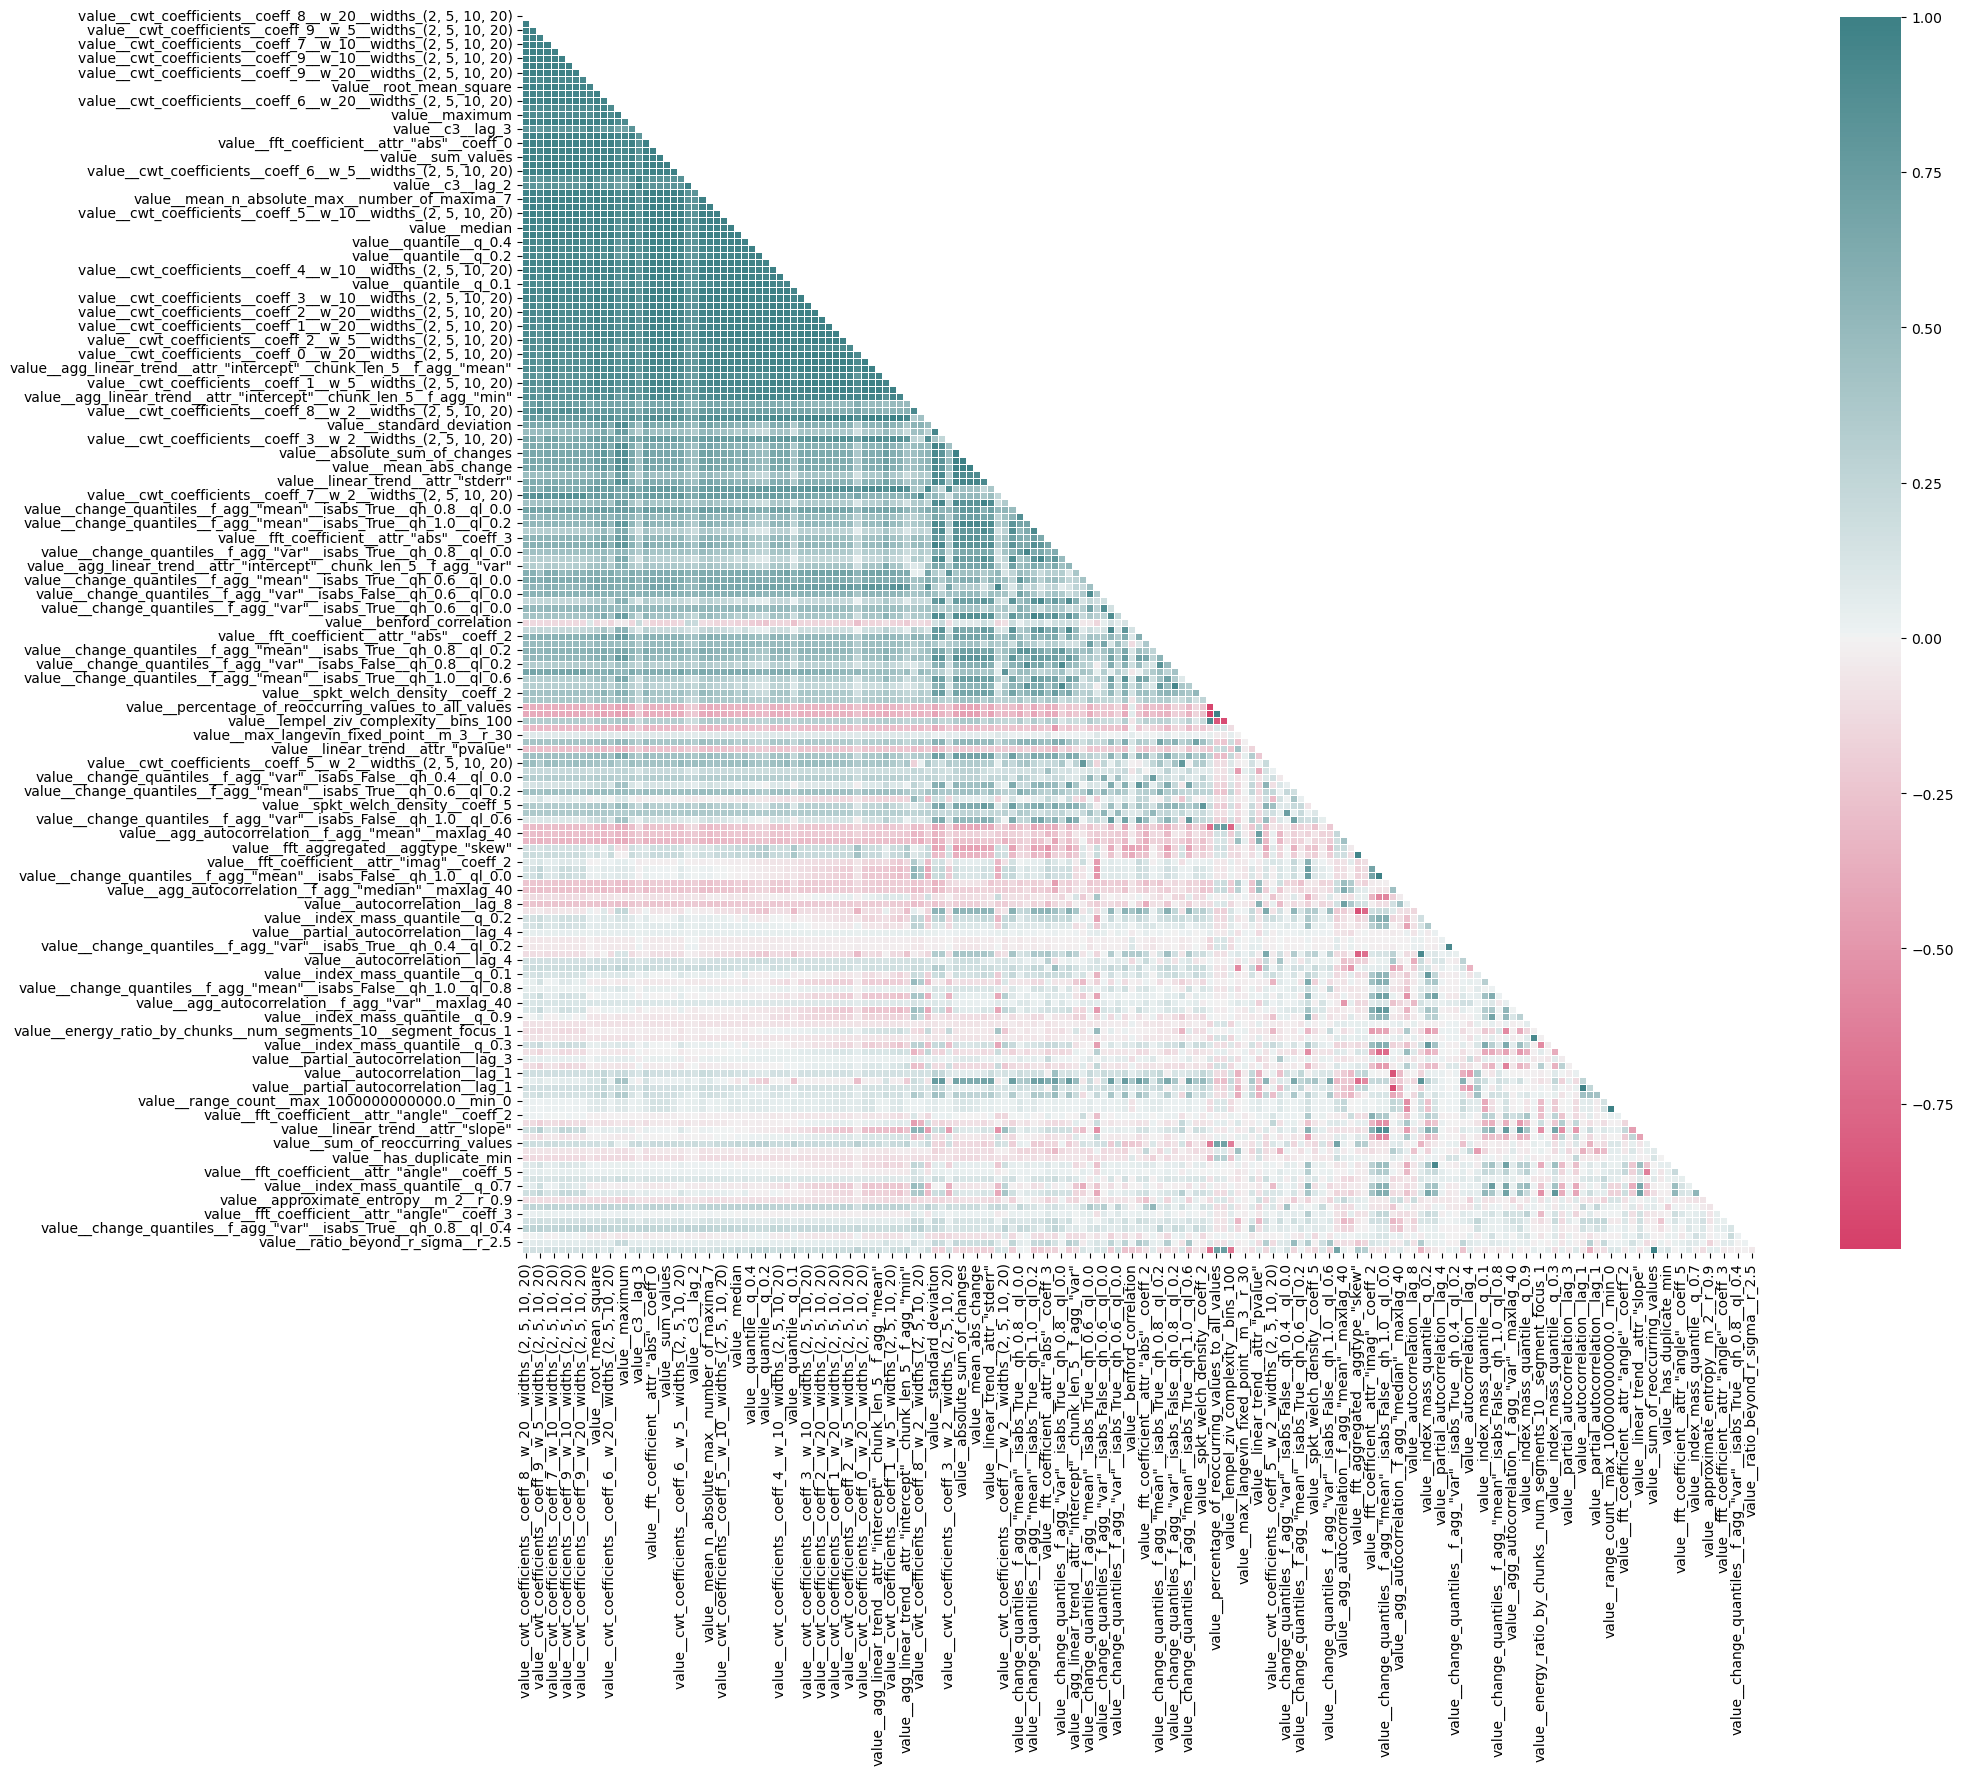

In [163]:
corr = small_feat_set_1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(1, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.8})

In [164]:
threshold = 0.995
alta_corr = (corr[abs(corr) > threshold][corr != 1.0]).unstack().dropna().to_dict()
multicolineales = pd.DataFrame(list(set([(tuple(sorted(key)), alta_corr[key]) for key in alta_corr])), columns=['feature_pair', 'correlation_coefficient'])
multicolineales = multicolineales.loc[abs(multicolineales['correlation_coefficient']).argsort()[::-1]]
pd.options.display.max_colwidth = 200
multicolineales

,feature_pair,correlation_coefficient
41,"(value__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0, value__mean_change)",0.999999
58,"(value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20))",0.999845
67,"(value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20))",0.999842
45,"(value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20))",0.999821
86,"(value__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20))",0.999806
...,...,...
31,"(value__quantile__q_0.3, value__quantile__q_0.4)",0.995163
74,"(value__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20))",0.995135
27,"(value__c3__lag_1, value__c3__lag_2)",0.995113
46,"(value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20))",0.995081


In [165]:
small_feat_set_1 = small_feat_set_1.drop(['value__absolute_sum_of_changes','value__mean',
'value__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_2__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)',
'value__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0',
'value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
'value__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_4__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
'value__mean_n_absolute_max__number_of_maxima_7',
'value__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)',
'value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)',
'value__c3__lag_2',
'value__quantile__q_0.3'],axis=1)

In [166]:
corr = small_feat_set_1.corr()
threshold = 0.995
alta_corr = (corr[abs(corr) > threshold][corr != 1.0]).unstack().dropna().to_dict()
multicolineales = pd.DataFrame(list(set([(tuple(sorted(key)), alta_corr[key]) for key in alta_corr])), columns=['feature_pair', 'correlation_coefficient'])
multicolineales = multicolineales.loc[abs(multicolineales['correlation_coefficient']).argsort()[::-1]]
pd.options.display.max_colwidth = 200
multicolineales

,feature_pair,correlation_coefficient
7,"(value__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20))",0.998046
13,"(value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20))",0.997987
2,"(value__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20))",0.997749
18,"(value__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20))",0.997524
14,"(value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20))",0.997103
5,"(value__cwt_coefficients__coeff_3__w_20__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20))",0.997101
16,"(value__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20))",0.996614
11,"(value__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean"", value__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20))",0.996504
10,"(value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20))",0.996315
6,"(value__cwt_coefficients__coeff_4__w_10__widths_(2, 5, 10, 20), value__cwt_coefficients__coeff_5__w_10__widths_(2, 5, 10, 20))",0.996091


# 4. Modelo

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(small_feat_set, y_1)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be

In [168]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 165.1375373873874
R2 Score: 0.8179671682950073
Mean Absolute Percentage Error: 0.16221099170309541


/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/juanpablosalas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(d